<a href="https://colab.research.google.com/github/Muskan520/Stock-prediction-models/blob/main/Decision_tree_HP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Decision tree regressor 
#Predicting adjusted closed price of Hp stock


In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [2]:
#Load the Data
df=pd.read_csv('/content/HP.csv') 
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-06-07,62.910000,64.230003,62.259998,64.120003,43.386513,1181500
1,2013-06-10,64.320000,64.570000,63.330002,64.330002,43.528614,883300
2,2013-06-11,63.119999,63.320000,62.049999,62.380001,42.209152,1529500
3,2013-06-12,62.810001,63.110001,60.950001,60.970001,41.255081,989300
4,2013-06-13,60.990002,62.000000,60.700001,61.910000,41.891129,1392100
...,...,...,...,...,...,...,...
2008,2021-05-28,29.059999,29.100000,28.160000,28.250000,28.250000,1154400
2009,2021-06-01,29.049999,30.059999,28.969999,30.059999,30.059999,1735900
2010,2021-06-02,30.370001,32.700001,30.070000,32.349998,32.349998,2201900
2011,2021-06-03,32.349998,33.099998,31.700001,33.029999,33.029999,2164500


In [3]:
df.shape

(2013, 7)

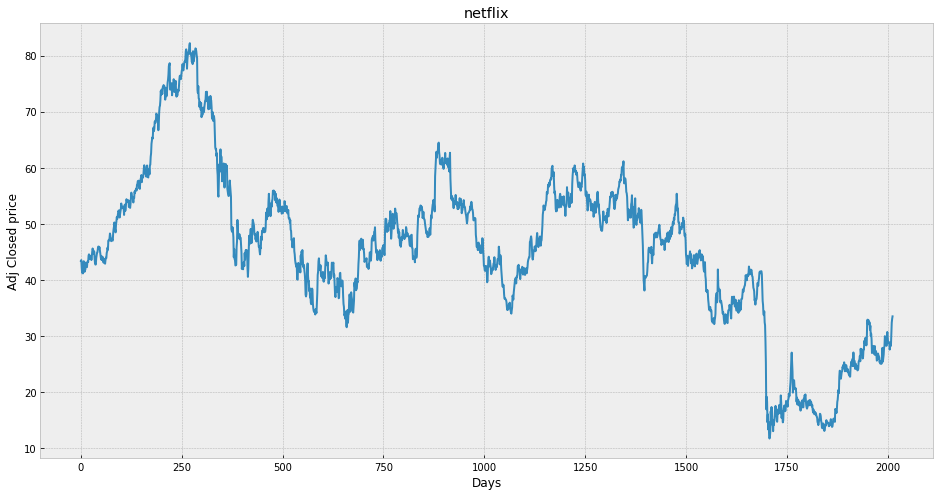

In [4]:
#Visualize
plt.figure(figsize=(16,8))
plt.title('netflix')
plt.xlabel('Days')
plt.ylabel('Adj Closed price')
plt.plot(df['Adj Close'])
plt.show()

In [5]:
df=df[['Adj Close']]
df

,Adj Close
0,43.386513
1,43.528614
2,42.209152
3,41.255081
4,41.891129
...,...
2008,28.250000
2009,30.059999
2010,32.349998
2011,33.029999


In [6]:
#Create a variable to create 'x days out in the future
future_days=30
#Create a new column shifted x units
df['Prediction']=df[['Adj Close']].shift(-future_days)
df



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Adj Close,Prediction
0,43.386513,45.335251
1,43.528614,45.233742
2,42.209152,44.618004
3,41.255081,45.037521
4,41.891129,43.799267
...,...,...
2008,28.250000,NaN
2009,30.059999,NaN
2010,32.349998,NaN
2011,33.029999,NaN


In [7]:
#Create the feature data set(X) and covert to it to a numpy array and remove last x days.
X=np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[43.386513]
 [43.528614]
 [42.209152]
 ...
 [25.276159]
 [25.543789]
 [25.038265]]


In [8]:
#Create the target data st
y=np.array(df['Prediction'])[:-future_days]
print(y)

[45.335251 45.233742 44.618004 ... 32.349998 33.029999 33.490002]


In [9]:
#Split data in 75% train and 25% test
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [10]:
#create the models
#create the decision tree regressor
tree=DecisionTreeRegressor().fit(x_train,y_train)


In [11]:
#get the last x rows of feature dataset
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future


array([[32.432781],
       [32.125504],
       [32.432781],
       [31.114454],
       [31.828136],
       [29.994375],
       [30.400776],
       [29.399641],
       [26.951324],
       [27.000885],
       [27.347813],
       [28.210175],
       [27.189217],
       [27.209042],
       [26.723341],
       [28.190351],
       [26.614309],
       [26.653957],
       [27.28834 ],
       [26.663868],
       [25.593349],
       [25.702385],
       [25.841154],
       [26.862114],
       [26.544924],
       [26.406151],
       [26.138523],
       [25.276159],
       [25.543789],
       [25.038265]])

In [12]:
#Show the model tree prediction
tree_prediction=tree.predict(x_future)
print(tree_prediction)
print()



[25.0580905 25.295984  25.0580905 26.792728  27.873161  25.405016
 26.049313  25.841154  27.922722  28.150702  29.954725  29.429379
 28.576927  28.99324   27.4766705 29.35      30.709999  29.77
 29.954725  28.719999  28.9       28.629999  27.57      28.210175
 30.709999  28.25      26.614309  32.349998  33.029999  33.490002 ]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


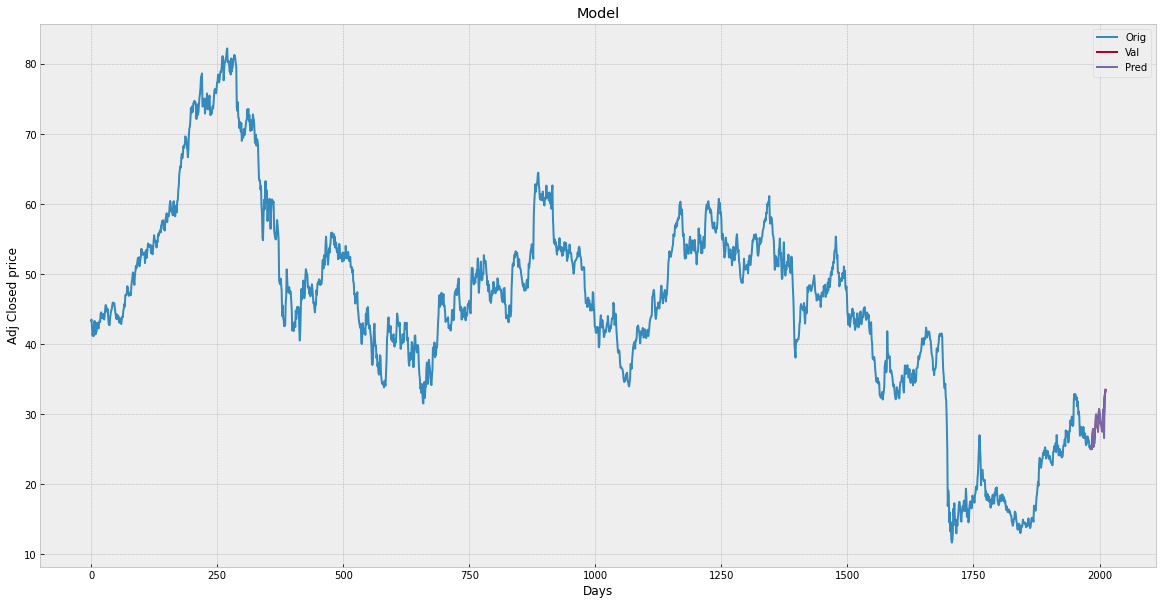

In [13]:
#Visulaize
predictions=tree_prediction

valid=df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Adj Closed price')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()